In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
from random import randint
import math
from sklearn.utils import shuffle

In [2]:
(X, y) = make_blobs(n_samples=500, n_features=20, centers=2,cluster_std=3.1,random_state=95) #Original Data

In [3]:
for i in range(len(X)):
    for j in range(len(X[0])-8):
        rand_no = randint(0,len(X[0])-1)
        X[i][rand_no] = 0 

In [4]:
X = np.c_[np.ones((X.shape[0])), X] #For absorbing bias

In [16]:
con_fac = 0.0005
alpha = 0.01
epochs = 100
batchsize = 1 #same bathcsize for every algorithms
W1 = np.random.uniform(size=(X.shape[1],)) #same initial weights
W1 = tuple(W1)

In [17]:
def gradient_descent(X,y,alpha,epochs):
    W = []
    W = list(W1)
    loss_list = []
    flag=True
    num = epochs
    for epoch in range(0,epochs):
        prediction = 1.0 / (1 + np.exp(-(X.dot(W))))
        error = prediction - y
        loss = np.sum(error ** 2)
        loss_list.append(loss/len(X))
        gradient = X.T.dot(error) / X.shape[0]
        W += -(alpha) * gradient
        if(loss/len(X)<con_fac and flag==True): #for storing number of epochs to reach the convergence factor
            num = epoch
            flag=False
    return loss_list,W,num

In [18]:
def stochastic_gradient_descent(X,y,alpha,epochs,batchsize):
    W = []
    W = list(W1)
    flag = True
    num = epochs
    loss_list = []
    variance_loss_list =[] #for showing the fluctuations
    for epoch in range(0,epochs):
        X, y = shuffle(X, y, random_state=0)
        loss_curr = []
        for rand_no in range(0,len(X),batchsize):
            X_new = X[rand_no:rand_no+batchsize]
            y_new = y[rand_no:rand_no+batchsize]
            prediction = 1.0 / (1 + np.exp(-(X_new.dot(W))))
            error = prediction - y_new
            loss = np.sum(error ** 2)
            loss_curr.append(loss)
            gradient = X_new.T.dot(error) / X_new.shape[0]
            W += -(alpha) * gradient
        loss_list.append(np.average(loss_curr))
        if(np.average(loss_curr)<con_fac and flag==True):
                num = epoch
                flag = False
    return loss_list,W,num

In [19]:
def sgd_momentum(X,y,alpha,epochs,batchsize):
    W = []
    flag = True
    num = epochs
    W = list(W1)
    beta=0.9
    v = np.zeros(len(W))
    loss_list = []
    for epoch in range(0,epochs):
        X, y = shuffle(X, y, random_state=0)
        loss_curr = []
        for rand_no in range(0,len(X),batchsize):
            X_new = X[rand_no:rand_no+batchsize]
            y_new = y[rand_no:rand_no+batchsize]
            prediction = 1.0 / (1 + np.exp(-(X_new.dot(W))))
            error = prediction - y_new
            loss = np.sum(error ** 2)
            loss_curr.append(loss)
            gradient = X_new.T.dot(error) / X_new.shape[0]
            v = (beta*(v)) + (alpha*gradient)
            W -= v
        loss_list.append(np.average(loss_curr))
        if(np.average(loss_curr)<con_fac and flag==True):
                num = epoch
                flag = False
    return loss_list,W,num

In [32]:
def adagrad(X,y,alpha,epochs,batchsize):
    num = epochs
    W = []
    W = list(W1)
    flag = True
    loss_list = []
    grad_history = np.zeros(len(W))
    fudge_factor = 1e-6
    loss_list = []
    for epoch in range(0,epochs):
        X, y = shuffle(X, y, random_state=0)
        loss_curr = []
        for rand_no in range(0,len(X),batchsize):
            X_new = X[rand_no:rand_no+batchsize]
            y_new = y[rand_no:rand_no+batchsize]
            prediction = 1.0 / (1 + np.exp(-(X_new.dot(W))))
            error = prediction - y_new
            loss = np.sum(error ** 2)
            loss_curr.append(loss)
            gradient = X_new.T.dot(error) / X_new.shape[0]
            grad_history+= (gradient ** 2)
            new_grad = gradient / np.sqrt(fudge_factor + (grad_history))
            W += -(alpha) * new_grad
        loss_list.append(np.average(loss_curr))
        if(np.average(loss_curr)<con_fac and flag==True):
                num = epoch
                flag = False
    return loss_list,W,num

In [33]:
def adadelta(X,y,alpha,epochs,batchsize):
    flag = True
    num = epochs
    W = []
    W = list(W1)
    loss_list = []
    decay_grad = np.zeros(len(W))
    decay_param = np.zeros(len(W))
    del_W = np.zeros(len(W))
    fudge_factor = 1e-6
    decay_rate = 0.9
    loss_list = []
    for epoch in range(0,epochs):
        X, y = shuffle(X, y, random_state=0)
        loss_curr = []
        for rand_no in range(0,len(X),batchsize):
            X_new = X[rand_no:rand_no+batchsize]
            y_new = y[rand_no:rand_no+batchsize]
            prediction = 1.0 / (1 + np.exp(-(X_new.dot(W))))
            error = prediction - y_new
            loss = np.sum(error ** 2)
            loss_curr.append(loss)
            grad = X_new.T.dot(error) / X_new.shape[0]
            decay_grad = (decay_rate*decay_grad) + ((1-decay_rate)*(grad ** 2))
            RMS_decay_grad = np.sqrt(fudge_factor + (decay_grad))
            del_W = - (np.sqrt(fudge_factor + (decay_param)) * grad) / RMS_decay_grad
            decay_param = (decay_rate*decay_param) + ((1-decay_rate)*(del_W ** 2))
            RMS_decay_param = np.sqrt(fudge_factor + (decay_param))
            W += - (RMS_decay_param*grad) / RMS_decay_grad
        loss_list.append(np.average(loss_curr))
        if(np.average(loss_curr)<con_fac and flag==True):
                num = epoch
                flag = False
    return loss_list,W,num

In [34]:
def RMSprop(X,y,alpha,epochs,batchsize):
    flag = True
    num = epochs
    W = []
    W = list(W1)
    loss_list = []
    decay_grad = np.zeros(len(W))
    decay_param = np.zeros(len(W))
    fudge_factor = 1e-6
    decay_rate = 0.9
    loss_list = []
    for epoch in range(0,epochs):
        X, y = shuffle(X, y, random_state=0)
        loss_curr = []
        for rand_no in range(0,len(X),batchsize):
            X_new = X[rand_no:rand_no+batchsize]
            y_new = y[rand_no:rand_no+batchsize]
            prediction = 1.0 / (1 + np.exp(-(X_new.dot(W))))
            error = prediction - y_new
            loss = np.sum(error ** 2)
            loss_curr.append(loss)
            grad = X_new.T.dot(error) / X_new.shape[0]
            decay_grad = (decay_rate*decay_grad) + ((1-decay_rate)*(grad ** 2))
            RMS_decay_grad = np.sqrt(fudge_factor + (decay_grad))
            W += - (alpha*grad) / RMS_decay_grad
        loss_list.append(np.average(loss_curr))
        if(np.average(loss_curr)<con_fac and flag==True):
                num = epoch
                flag = False
    return loss_list,W,num

In [35]:
def Adam(X,y,alpha,epochs,batchsize):
    flag = True
    num = epochs
    W = []
    W = list(W1)
    loss_list = []
    m_t = np.zeros(len(W))
    v_t = np.zeros(len(W))
    fudge_factor = 1e-6
    beta_1 = 0.9
    beta_2 = 0.999
    loss_list = []
    t=0
    for epoch in range(0,epochs):
        X, y = shuffle(X, y, random_state=0)
        loss_curr = []
        for rand_no in range(0,len(X),batchsize):
            t+=1
            X_new = X[rand_no:rand_no+batchsize]
            y_new = y[rand_no:rand_no+batchsize]
            prediction = 1.0 / (1 + np.exp(-(X_new.dot(W))))
            error = prediction - y_new
            loss = np.sum(error ** 2)
            loss_curr.append(loss)
            g_t = X_new.T.dot(error) / X_new.shape[0]
            m_t = beta_1*m_t + (1-beta_1)*g_t
            v_t = beta_2*v_t + (1-beta_2)*(g_t*g_t)
            m_cap = m_t/(1-(beta_1**t))
            v_cap = v_t/(1-(beta_2**t))
            W = W - (alpha*m_cap)/(np.sqrt(v_cap)+fudge_factor)
        loss_list.append(np.average(loss_curr))
        if(np.average(loss_curr)<con_fac and flag==True):
                num = epoch
                flag = False
    return loss_list,W,num

In [36]:
loss_list1,weights1,num1 = gradient_descent(X,y,alpha,epochs)

loss_list2,weights2,num2 = stochastic_gradient_descent(X,y,alpha,epochs,batchsize)

loss_list3,weights3,num3 = sgd_momentum(X,y,alpha,epochs,batchsize)

loss_list4,weights4,num4 = adagrad(X,y,alpha,epochs,batchsize)

loss_list5,weights5,num5 = adadelta(X,y,alpha,epochs,batchsize)

loss_list6,weights6,num6 = RMSprop(X,y,alpha,epochs,batchsize)

loss_list7,weights7,num7 = Adam(X,y,alpha,epochs,batchsize)

[]

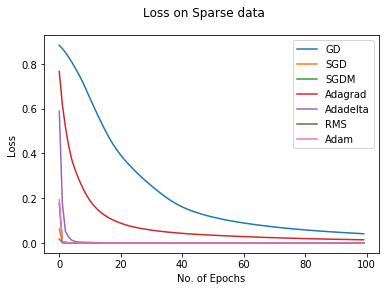

In [37]:
fig = plt.figure()
fig.suptitle("Loss on Sparse data ")
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.plot(np.arange(0, epochs), loss_list1)
plt.plot(np.arange(0, epochs), loss_list2)
plt.plot(np.arange(0, epochs), loss_list3)
plt.plot(np.arange(0, epochs), loss_list4)
plt.plot(np.arange(0, epochs), loss_list5)
plt.plot(np.arange(0, epochs), loss_list6)
plt.plot(np.arange(0, epochs), loss_list7)
plt.legend(['GD','SGD', 'SGDM', 'Adagrad', 'Adadelta', 'RMS', 'Adam'], loc='upper right')


plt.plot()